In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt
%matplotlib inline

In [24]:
#TASK 1
#параметры распределения
a = 3.0
b = 6.0

#frozen distribution
distributionRv = sts.uniform(loc = a, scale = b-a)
print(distributionRv)
# сгенерируем 1000 значений
distributionSample = distributionRv.rvs(1000)

#проверка задания распределения
print ('Theoretical mean: ', distributionRv.mean())
print ('Theoretical standard deviation: ', distributionRv.std())

Theoretical mean:  4.5
Theoretical standard deviation:  0.8660254037844386


Text(0, 0.5, 'pdf')

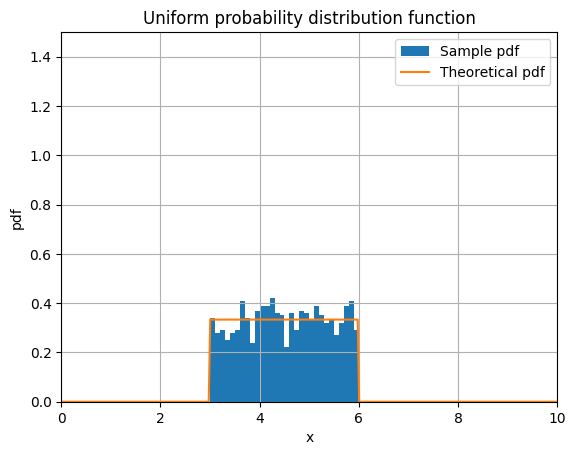

In [25]:
#гистограмма выборки
plt.hist(distributionSample, bins=30, density=True, label='Sample pdf')

#теоретическая плотность распределения
x = np.linspace(0,30,1000)
pdf = distributionRv.pdf(x)
plt.plot(x, pdf, label='Theoretical pdf')
plt.legend()
plt.grid()
plt.axis([0, 10, 0, 1.5])
plt.title('Uniform probability distribution function')
plt.xlabel('x')
plt.ylabel('pdf')

In [26]:
#количество выборок
sampleNum = 1000

#массив объёма выборок
sampleVolume = [5, 10, 50]

#массив под выборочное среднее значение, заполненный нулями
distributionSamples = np.zeros( (len(sampleVolume), sampleNum) )

#вычисление выборочных средних значений и занесение в массив
for i in range( len(sampleVolume) ):
    for j in range(sampleNum):
        distributionSampleTemp = np.array( sts.uniform.rvs(loc=a, scale=b-a, size=sampleVolume[i]) )
        distributionSampleTempMean = distributionSampleTemp.mean()
        distributionSamples[i, j] = distributionSampleTempMean
        
print (distributionSamples)

[[4.09957531 3.97237867 4.26647546 ... 4.68263686 4.96267183 4.27451671]
 [4.44068311 4.59676579 4.75399666 ... 4.17408138 4.58192171 4.0820946 ]
 [4.48175714 4.43159376 4.5160716  ... 4.59444608 4.57899119 4.45720613]]


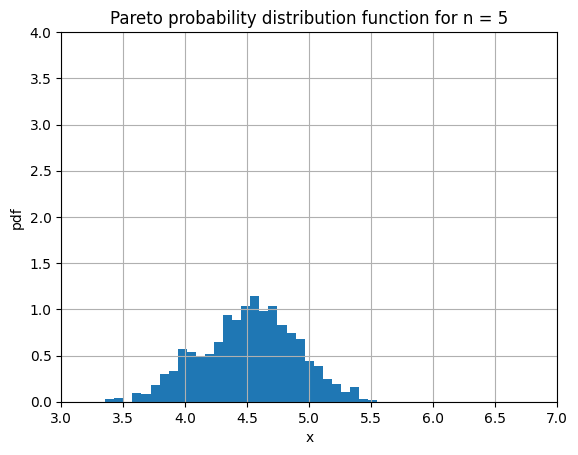

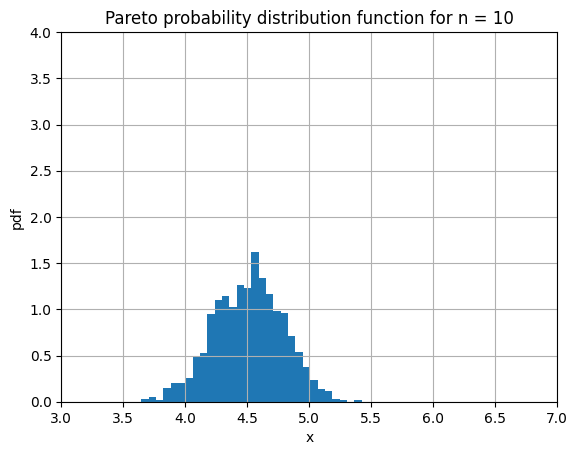

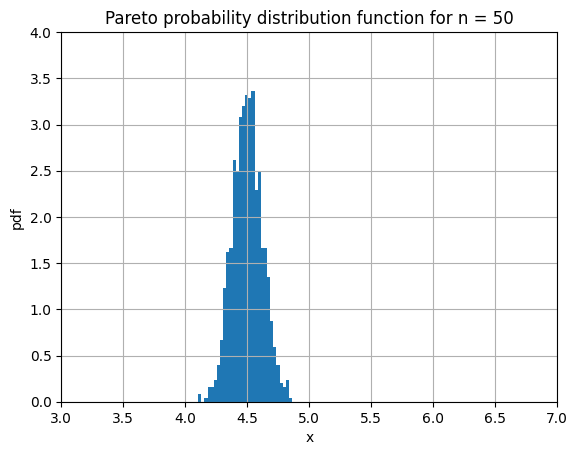

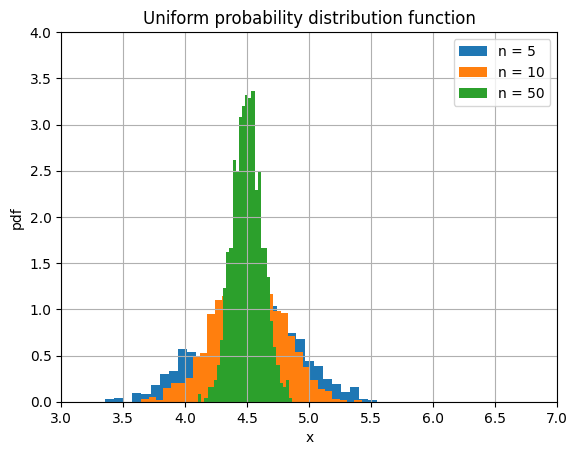

In [27]:
#гистограммы выборки
for i in range( len(sampleVolume) ):
    plt.hist(distributionSamples[i], bins=30, density=True)
    plt.grid()
    plt.axis([3, 7, 0, 4])
    plt.title('Pareto probability distribution function for n = ' + str(sampleVolume[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    plt.show()
    
for i in range( len(sampleVolume) ):
    plt.hist(distributionSamples[i], bins=30, density=True, label='n = ' + str(sampleVolume[i]))
    plt.grid()
    plt.axis([3, 7, 0, 4])
    plt.title('Uniform probability distribution function')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')

In [28]:
#Математическое ожидание и дисперсия

distributionSampleMean = (b+a)/2.
distributionSampleVariance = np.zeros( len(sampleVolume) )
for i in range( len(sampleVolume) ):
    distributionSampleVariance[i] = (b-a)**2/12./ sampleVolume[i]
    
print ('Математическое ожидание: ' + str(distributionSampleMean))
for i in range( len(sampleVolume) ):
    print ('Дисперсия для n = ' + str(sampleVolume[i]) + ': ' + str(distributionSampleVariance[i]))

Математическое ожидание: 4.5
Дисперсия для n = 5: 0.15
Дисперсия для n = 10: 0.075
Дисперсия для n = 50: 0.015


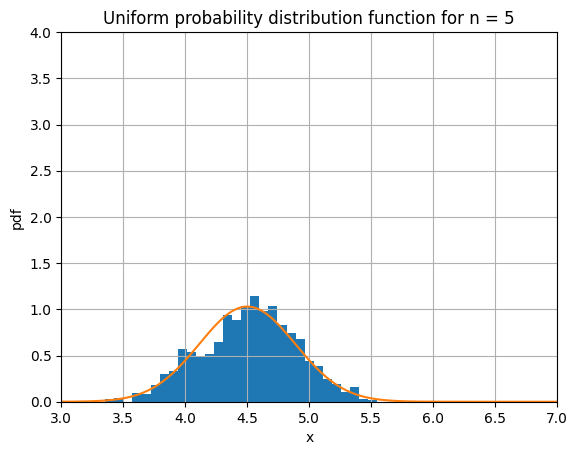

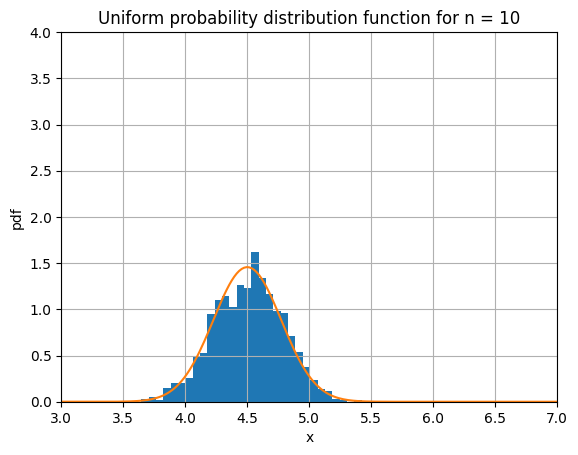

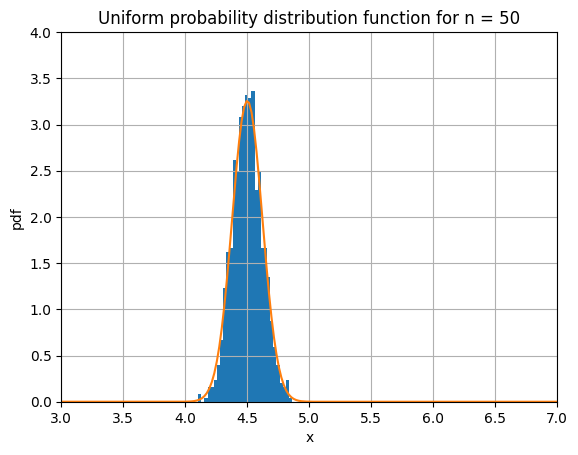

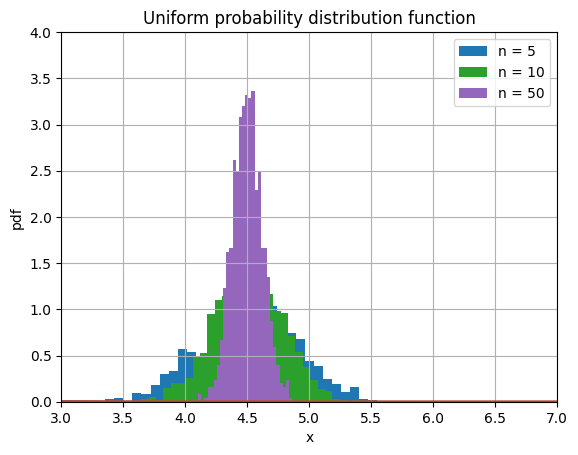

In [29]:
#гистограммы выборки
for i in range( len(sampleVolume) ):
    plt.hist(distributionSamples[i], bins=30, density=True)
    plt.grid()
    plt.axis([3, 7, 0, 4])
    plt.title('Uniform probability distribution function for n = ' + str(sampleVolume[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    
    # зададим нормально распределенную случайную величину
    mu = distributionSampleMean
    sigma = sqrt(distributionSampleVariance[i])
    normRv = sts.norm(loc=mu, scale=sigma)    
    x = np.linspace(-10,10,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)
    plt.show()
    
for i in range( len(sampleVolume) ):
    plt.hist(distributionSamples[i], bins=30, density=True, label='n = ' + str(sampleVolume[i]))
    plt.grid()
    plt.axis([3, 7, 0, 4])
    plt.title('Uniform probability distribution function')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')
    
    # зададим нормально распределенную случайную величину
    mu = distributionSampleMean
    sigma = sqrt(distributionSampleVariance[i])
    normRv = sts.norm(loc=0, scale=1)    
    x = np.linspace(-10,10,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)

In [30]:
help(sts.uniform)

Help on uniform_gen in module scipy.stats._continuous_distns:

<scipy.stats._continuous_distns.uniform_gen object>
    A uniform continuous random variable.
    
    In the standard form, the distribution is uniform on ``[0, 1]``. Using
    the parameters ``loc`` and ``scale``, one obtains the uniform distribution
    on ``[loc, loc + scale]``.
    
    As an instance of the `rv_continuous` class, `uniform` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, loc=0, scale=1)
        Probability density function.
    logpdf(x, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, loc=0, s

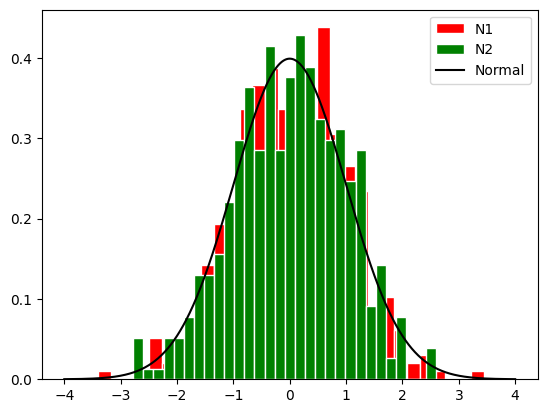

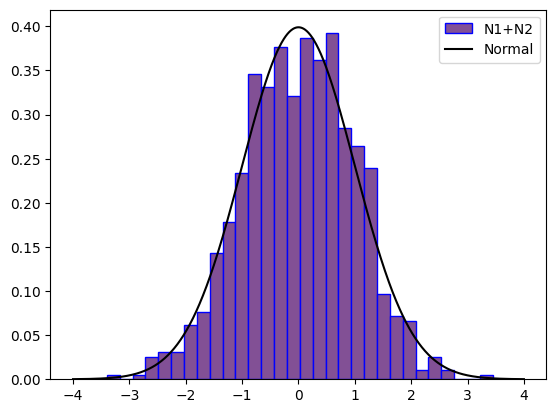

In [31]:
#TASK 2.1
def Box_Muller_Marsaglia(n=5000, a = -1, b = 1 ):
    #frozen distribution
    distributionRv = sts.uniform(loc = a, scale = b-a)
    # сгенерируем n*2 значений
    U1 = distributionRv.rvs(n*2)
    U2 = distributionRv.rvs(n*2)
    V1 = 2*U1 -1
    V2 = 2*U2 -1
    W = V1*V1 + V2*V2

    i = np.where(W<=1)
    Z1 = V1[i] * np.sqrt((-2*np.log(W[i]))/W[i])
    Z2 = V2[i] * np.sqrt((-2*np.log(W[i]))/W[i])      
    return(Z1,Z2)
n = 1000
N1,N2 = Box_Muller_Marsaglia(n)
plt.hist(N1,bins=30,color='red',ec='white',density=True,label='N1')
plt.hist(N2,bins=30,color='green',ec='white',density=True,label='N2')

normRv = sts.norm(loc=0, scale=1)    
x = np.linspace(-4,4,1000)
pdf = normRv.pdf(x)
plt.plot(x, pdf,color='black',label='Normal')
plt.legend()
plt.show()

rnorm_box = np.concatenate((N1,N2))[0:n]
plt.hist(rnorm_box,bins=30,color='#825095',ec='blue',density=True,label='N1+N2')
plt.plot(x, pdf,color='black',label='Normal')
plt.legend()
plt.show()

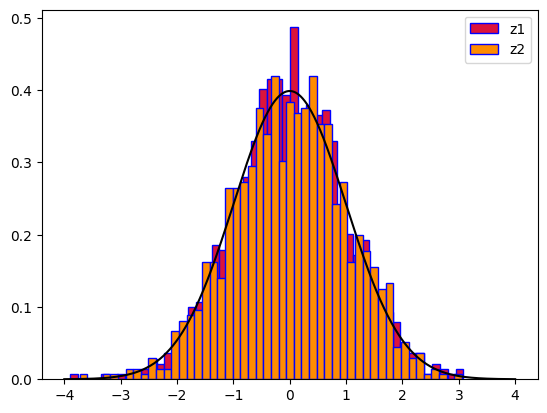

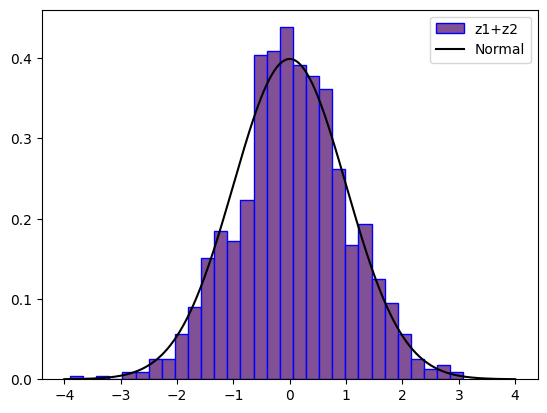

In [32]:
#TASK 2.2
from numpy.random import random

def Box_Muller(n=5000):
    x1=np.random.random(n)
    x2=np.random.random(n)
    
    r=np.sqrt(-2*np.log(x1))
    theta=2*np.pi*x2
    
    z1=r*np.cos(theta)
    z2=r*np.sin(theta)
    return(z1,z2)

n=1000
z1,z2 = Box_Muller(n)
plt.hist(z1,bins=50,color='crimson',label='z1',ec='blue',density=True)
plt.hist(z2,bins=50,color='darkorange',label='z2',ec='blue',density=True)
plt.legend()

normRv = sts.norm(loc=0, scale=1)    
x = np.linspace(-4,4,1000)
pdf = normRv.pdf(x)
plt.plot(x, pdf,color='black')
plt.show()

rnorm_box = np.concatenate((z1,z2))[0:n]
plt.hist(rnorm_box,bins=30,color='#825095',ec='blue',density=True,label='z1+z2')
plt.plot(x, pdf,color='black',label='Normal')
plt.legend()
plt.show()

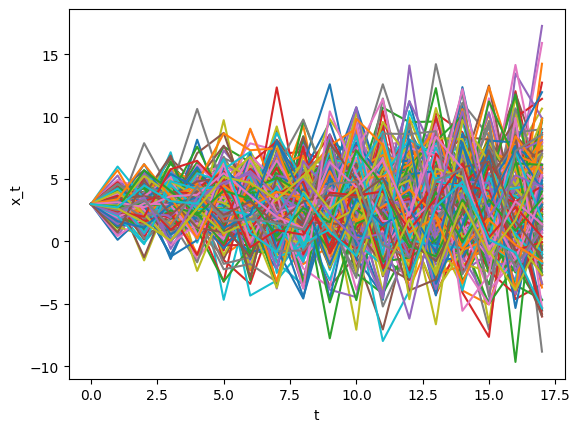

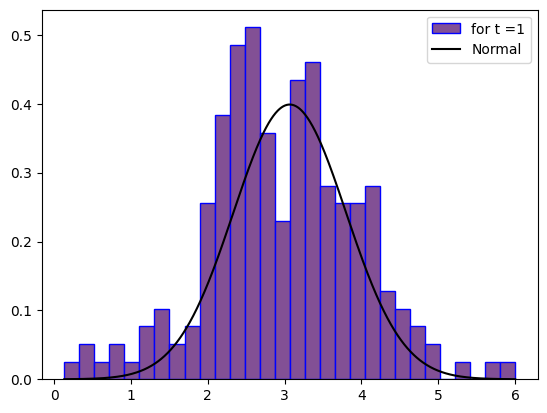

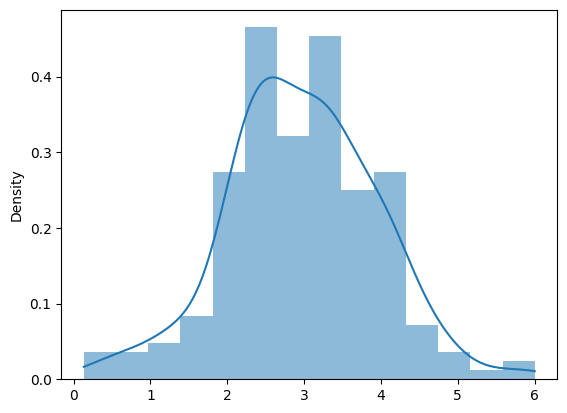

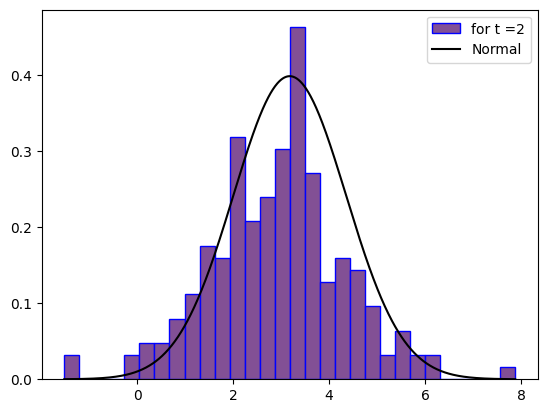

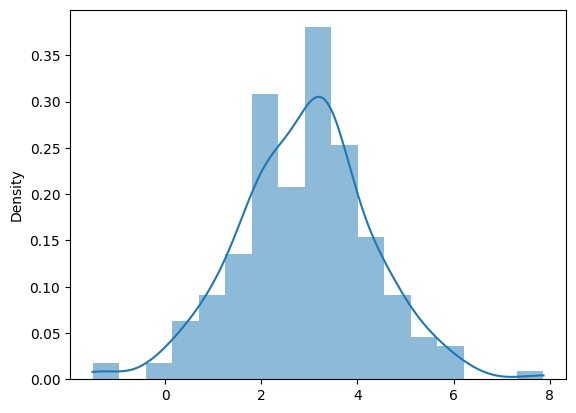

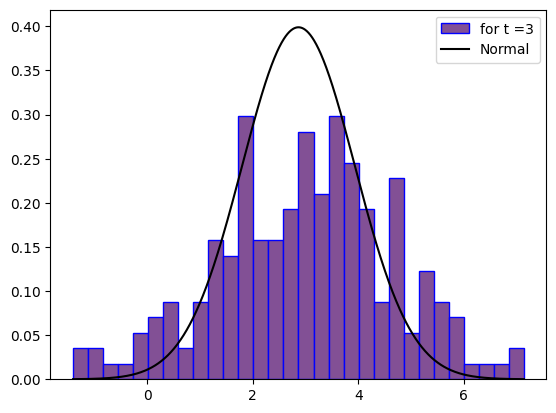

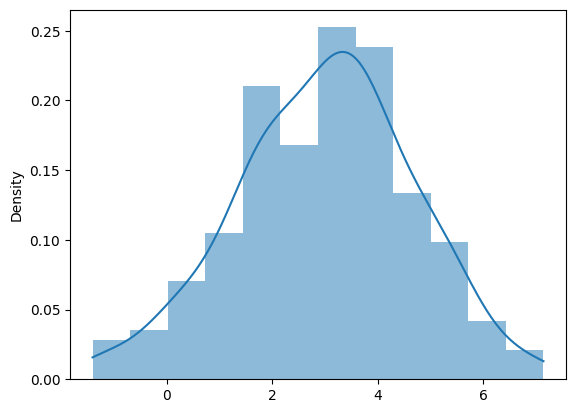

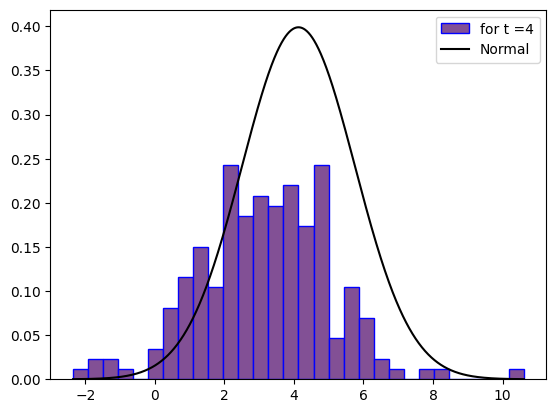

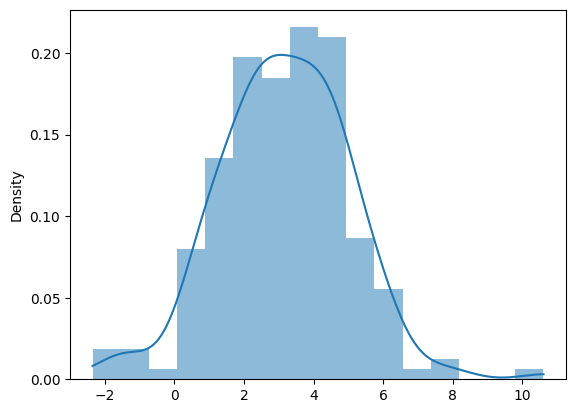

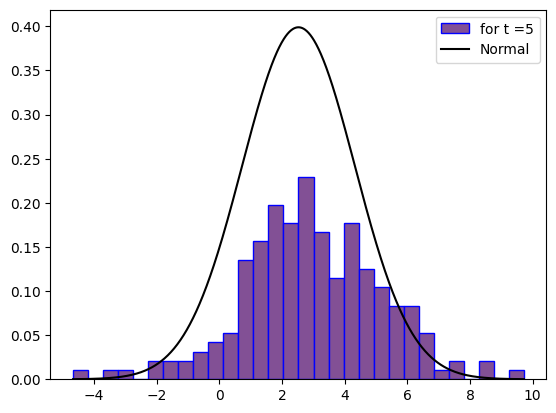

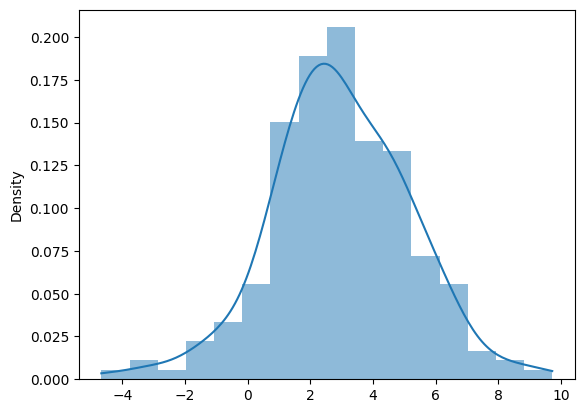

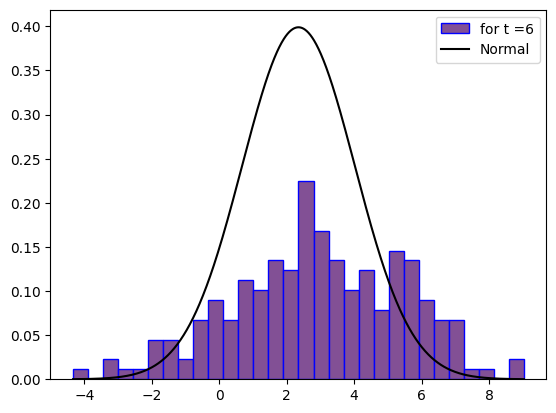

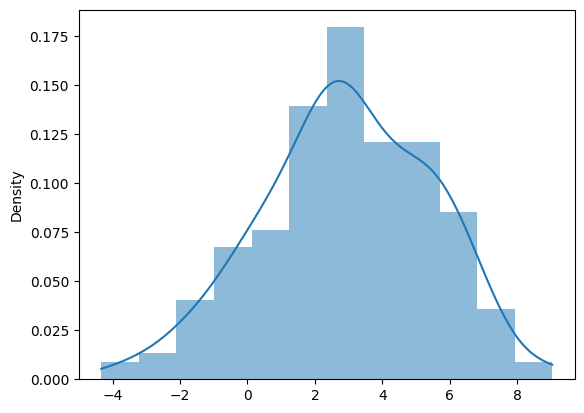

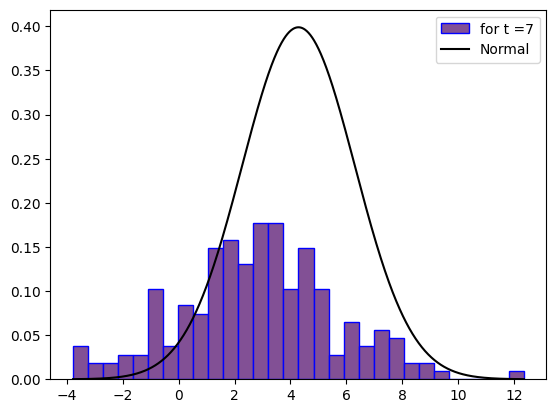

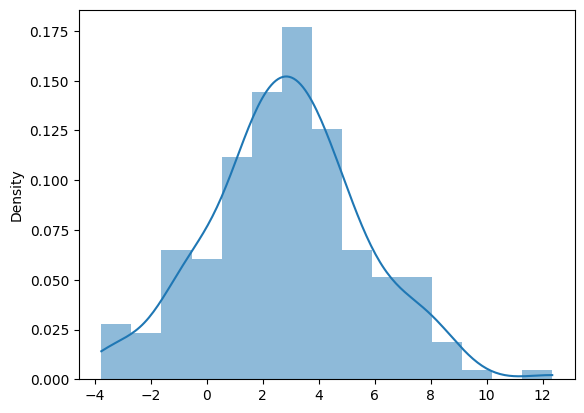

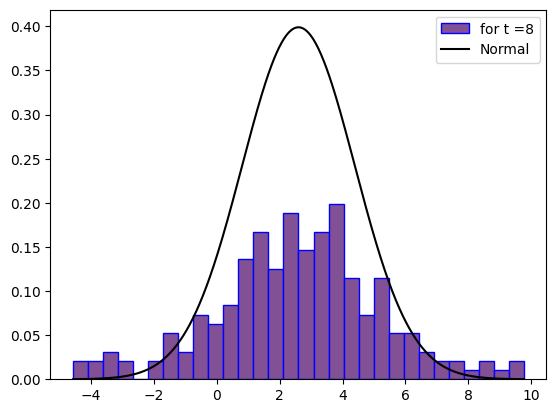

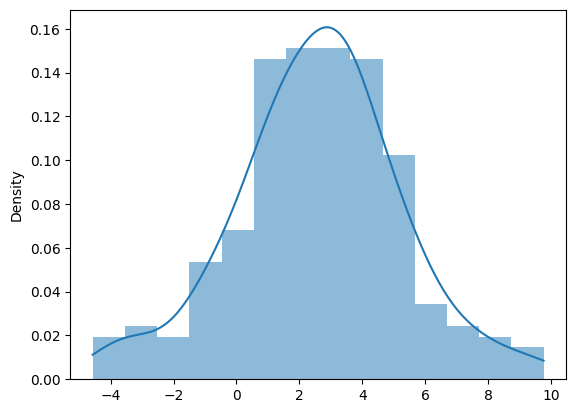

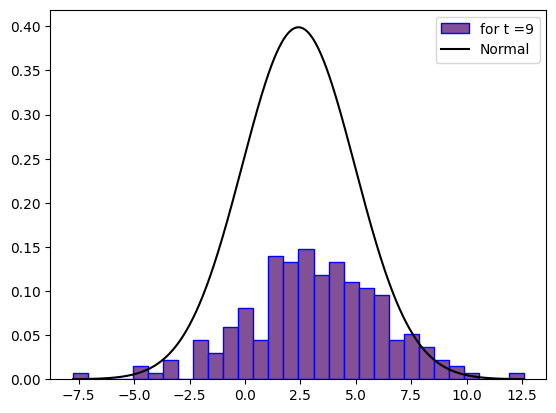

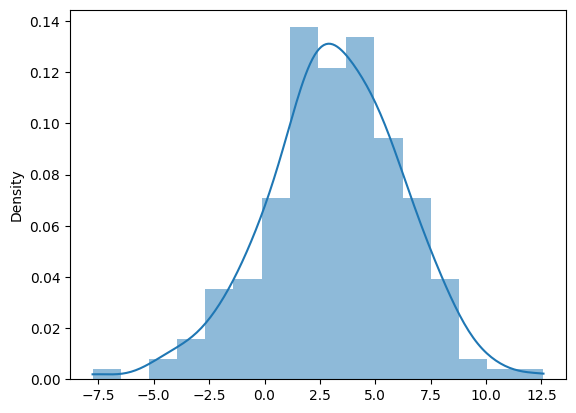

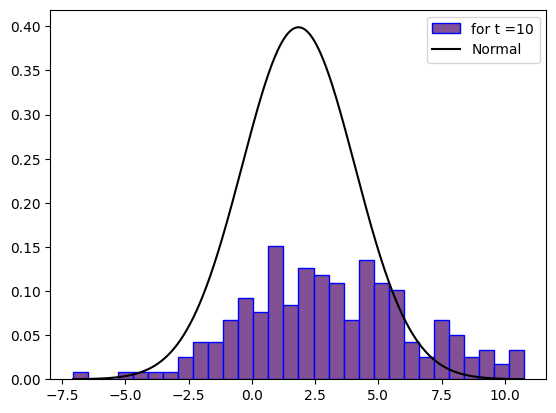

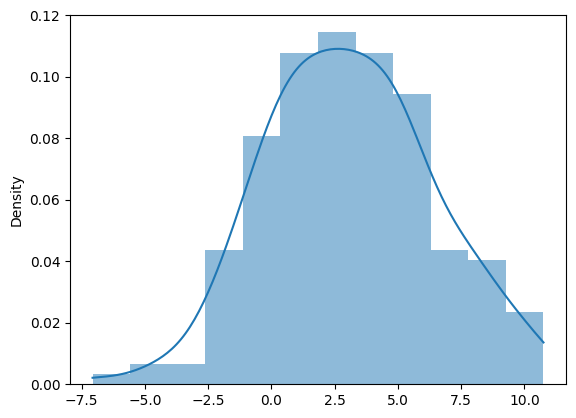

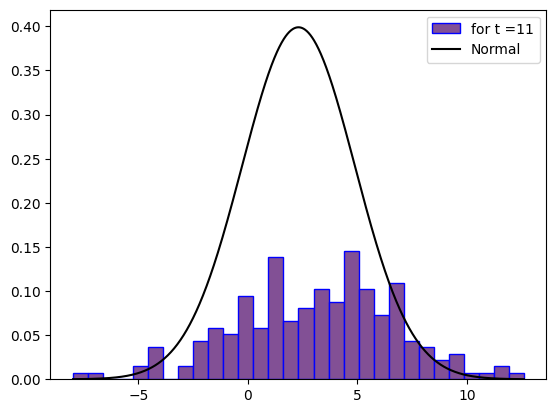

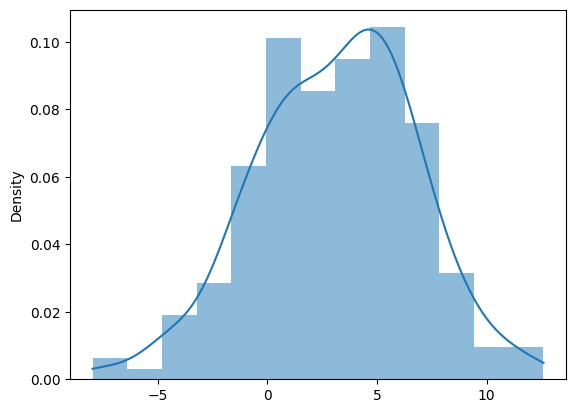

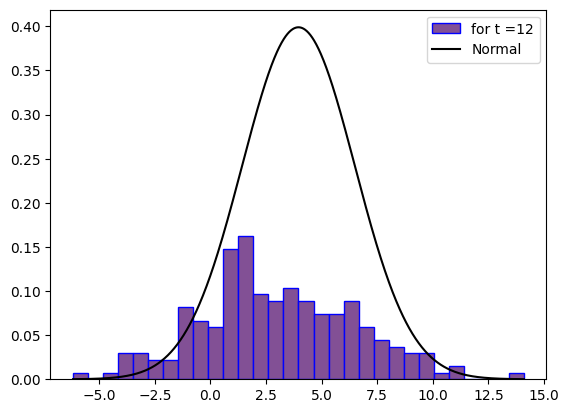

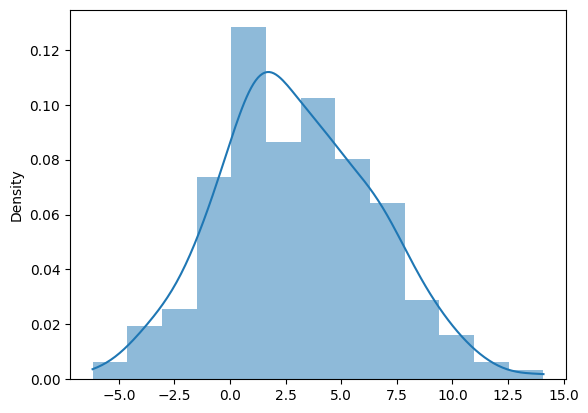

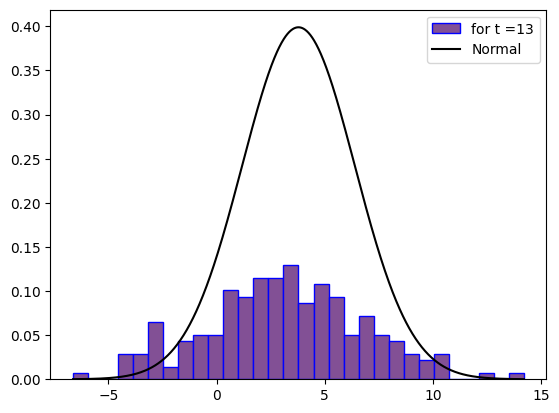

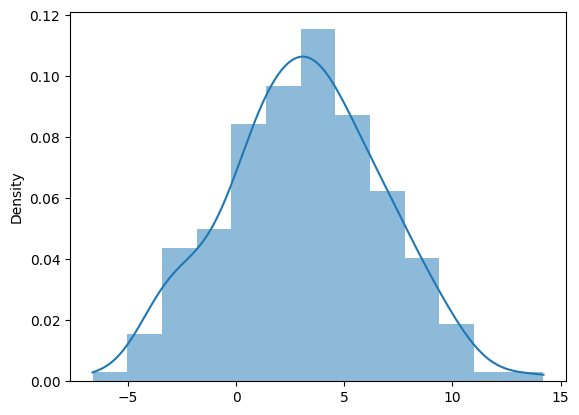

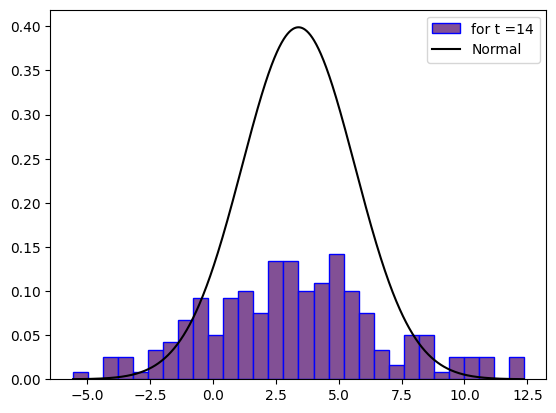

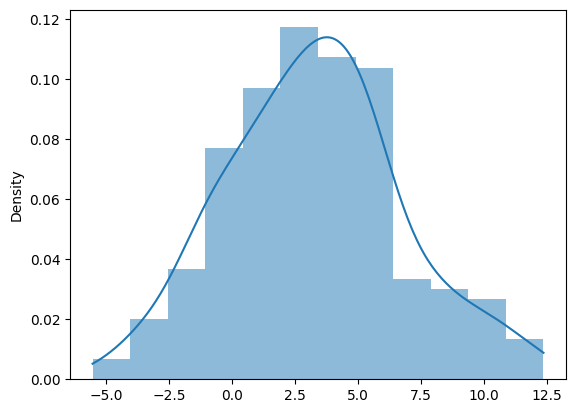

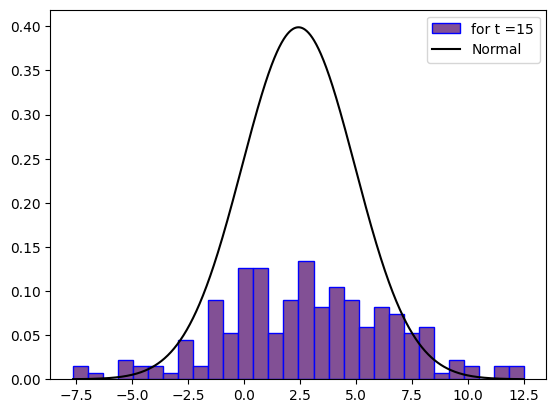

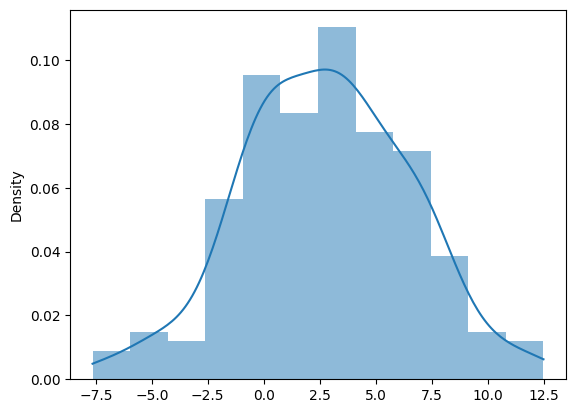

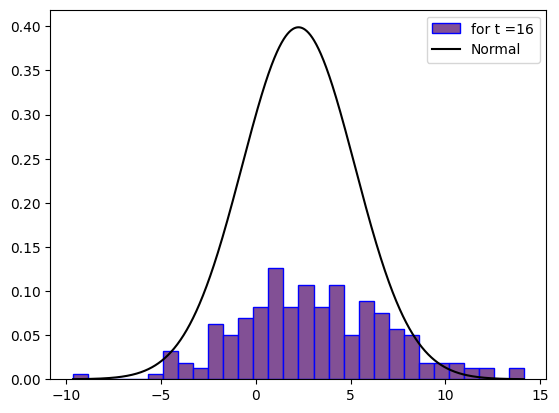

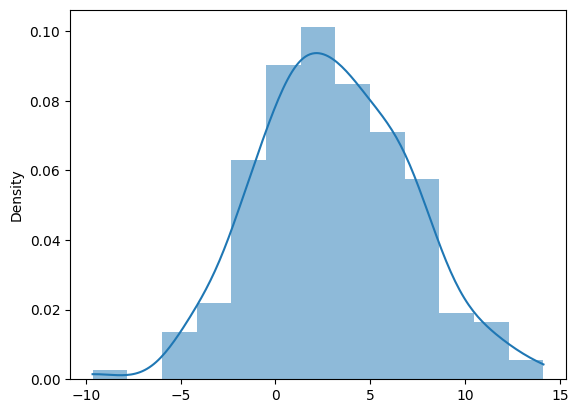

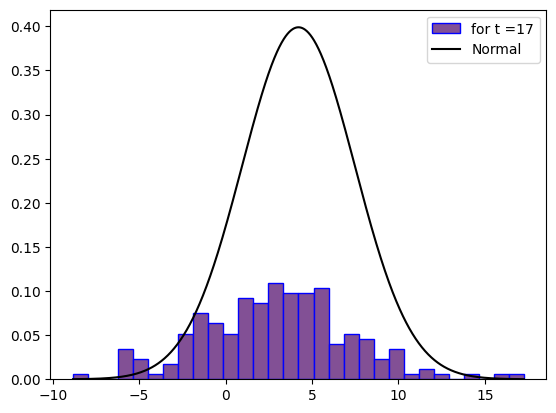

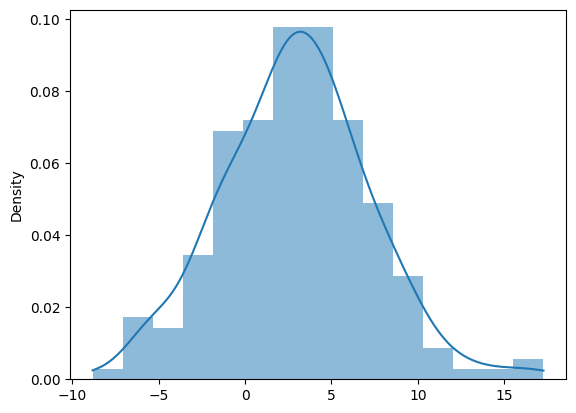

mathematical_expectation  [2.97096668 2.90854326 2.99931112 3.16508953 2.96488406 2.93377016
 2.84924599 2.57618975 3.15822047 3.08029755 3.12099445 3.00853736
 3.14436269 3.26982473 2.77563738 3.10685855 2.93749843] 

18
17
[  1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289]
Error 0.43700059916962214


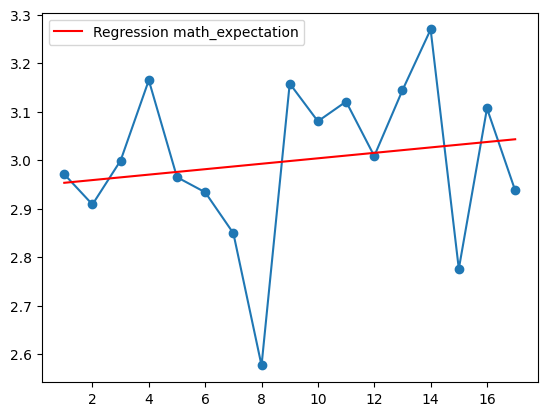

Error 0.29976904306162777


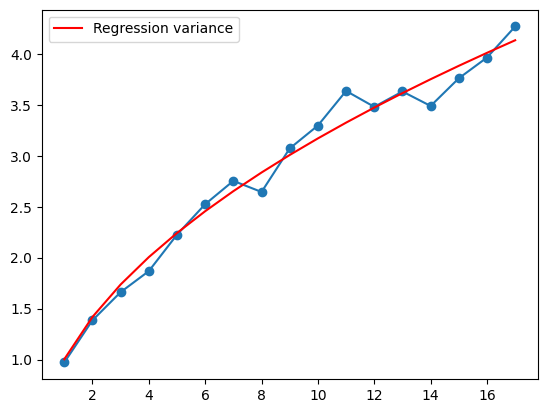

In [33]:
#TASK 3
import seaborn as sns
from scipy import linalg
N = 3
x0 = N
k = 200
t = 15 + N
x_t = np.zeros(t)
accumulationX = 0
process_data = np.zeros((k, t))

for j in range(k):
    current_process = np.zeros(t)
    space = np.zeros(t)
    z1,z1 = Box_Muller(t)
    current_epsilon = np.concatenate((z1,z2))[0:n]
    epsilonSum = 0
    for i in range(t):
        #sigma = 1
        
        #var1
        #epsilonSum += current_epsilon[i]
        
        #var2 
        epsilonSum = current_epsilon[i] * pow(i, 0.5)
        
        accumulationX = x0 + epsilonSum
        current_process[i] = accumulationX
        space[i] = i
    process_data[j] = current_process
    plt.plot(space, current_process)
plt.xlabel('t')
plt.ylabel('x_t')
plt.show()
data_hist = process_data.transpose()

mathematical_expectation = np.zeros(t-1)
variance = np.zeros(t-1)
for i in range(1,t):
    plt.hist(data_hist[i],bins=30,color='#825095',ec='blue',density=True,label='for t =' +str(i))
    
    x = np.linspace(min(data_hist[i]),max(data_hist[i]),1000)
    plt.plot(x, pdf,color='black',label='Normal')
    
    plt.legend()
    plt.show()
    sns.histplot(data_hist[i], kde=True, stat="density", linewidth=0)
    plt.show()
    
    mathematical_expectation[i-1] = 1/k*np.sum(data_hist[i])
    variance[i-1] = 1/k *np.sum((data_hist[i] - mathematical_expectation[i-1])**2)
print("mathematical_expectation ",mathematical_expectation,"\n")
variance = np.sqrt(variance)
print(t)
print(len(variance))
t_array = np.array(range(1,t))
print(t_array**2)

A = [[np.sum(t_array**2),np.sum(t_array)],
     [np.sum(t_array),len(mathematical_expectation)]]
B = [
    [np.sum(mathematical_expectation*t_array)],
    [np.sum(mathematical_expectation)]
    ]
a,b = linalg.solve(A, B)
#print(a, b)
a = a.item()
b = b.item()
W = np.sum((a*t_array + b - mathematical_expectation)**2)
print("Error",W)
#print(a,b)
plt.plot(t_array,mathematical_expectation,marker='o')
f = lambda t: a*t+b
plt.plot(t_array,f(t_array),color='red',label='Regression math_expectation')
plt.legend()
plt.show()
a = np.sum(np.sqrt(t_array)*variance)/np.sum(t_array)
W = np.sum((a*np.sqrt(t_array) - variance)**2)
print("Error",W)
plt.plot(t_array,variance,marker='o')
f = lambda t: a*t**0.5
plt.plot(t_array,f(t_array),color='red',label='Regression variance')
plt.legend()
plt.show()
